## 逻辑回归-线性不可分案例
## 案例：设想你是工厂的生产主管，你要决定是否芯片要被接受或抛弃
## 数据集：ex2data2.txt,芯片在两次测试中的测试结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


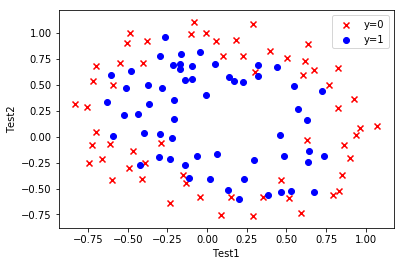

In [3]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')
plt.show()

## 特征映射

In [4]:
def feature_mapping(x1,x2,power):
    data = {}
    
    for i in np.arange(power+1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j) * np.power(x2,j)
            
    return pd.DataFrame(data) 
                 

In [5]:
x1 = data['Test 1']
x2 = data['Test 2']

In [6]:
data2 = feature_mapping(x1,x2,6)

In [7]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## 构造数据集

In [8]:
X = data2.values

In [9]:
X.shape

(118, 28)

In [10]:
y = data.iloc[:,-1].values

In [11]:
y = y.reshape(len(y),1)
y.shape

(118, 1)

## 损失函数

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def costFunction(X,y,theta,lamda):
    A = sigmoid(X@theta)
    
    first = y*np.log(A)
    second = (1-y) * np.log(1-A)
    
    reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X)))
    
    return -np.sum(first + second ) / len(X) + reg

In [14]:
theta = np.zeros((28,1))
theta.shape

(28, 1)

In [15]:
lamda = 1

In [16]:
cost_init = costFunction(X,y,theta,lamda)
print(cost_init)

0.6931471805599454


## 梯度下降函数

In [17]:
def gradientDescent(X,y,theta,alpha,iters,lamda):
    
    costs = []
    
    for i in range(iters):
        
        reg = theta[1:] * (lamda / len(X))
        reg = np.insert(reg,0,values=0,axis=0)
        
        theta = theta - (X.T@(sigmoid(X@theta) - y)) * alpha / len(X) -reg
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
        
        if i % 1000 == 0:
            print(cost)
            
    return theta,costs

In [18]:
alpha = 0.001
iters = 200000
# lamda = 0.001
lamda = 0.0001

In [19]:
theta_final,costs = gradientDescent(X,y,theta,alpha,iters,lamda)

0.6931343807989365
0.6818251295520225
0.6726123504198571
0.6646681741522373
0.657556742954012
0.6510397720168815
0.6449793450420283
0.6392897182114605
0.633913310441887
0.6288085690355281
0.6239436860150068
0.6192932241718918
0.6148362129205163
0.6105550043294182
0.6064345360335888
0.6024618224671804
0.5986255821394177
0.5949159516960192
0.591324259260066
0.5878428407752999
0.5844648890518862
0.5811843285364423
0.5779957107813518
0.5748941268155097
0.5718751334442831
0.568934691097483
0.5660691112887476
0.5632750120964555
0.560549280353228
0.5578890394557677
0.555291621890765
0.5527545457241781
0.5502754944264734
0.547852299510228
0.5454829255426336
0.5431654571670084
0.5408980878269398
0.5386791099362078
0.5365069062789107
0.5343799424586224
0.5322967602441216
0.5302559716832272
0.5282562538763249
0.5262963443179683
0.5243750367289971
0.5224911773134182
0.5206436613842063
0.5188314303105062
0.5170534687457308
0.5153088021019608
0.5135964942410272
0.5119156453568808
0.5102653900274048


In [20]:
def predict(X,theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

In [21]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc  = np.mean(y_pre == y)

print(acc)

0.8135593220338984


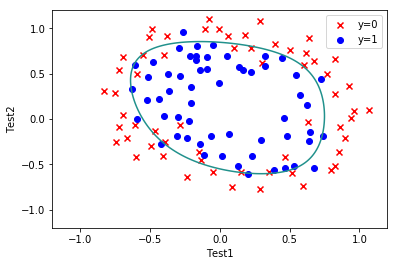

In [22]:
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = feature_mapping(xx.ravel(),yy.ravel(),6).values

zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')

plt.contour(xx,yy,zz,0)
plt.show()
